In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [38]:
from google.colab import files
uploaded = files.upload()

Saving Dry_Bean_Dataset.csv to Dry_Bean_Dataset (1).csv


In [39]:
df=pd.read_csv('/content/Dry_Bean_Dataset.csv')

About Dataset

In [40]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [42]:
df.shape

(13611, 17)

Pre-Processing

In [43]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [44]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

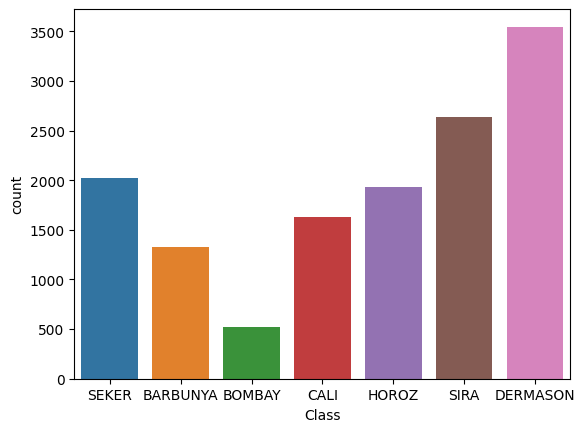

In [45]:
sns.countplot(x='Class',data=df)

In [46]:
X=df.iloc[:,0:-1]
y=df['Class']

In [47]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777587,
        -0.2764814 ,  0.71371948]])

Creating 10 samples

In [48]:
samples=[]
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=i)
  samples.append((X_train, X_test, y_train, y_test))

In [49]:
samples

[(        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
  10704  27490    618.868       233.001523       151.202562      1.540989   
  13145  37946    738.476       264.960115       182.588263      1.451134   
  2571   67686   1044.470       368.601069       234.202503      1.573856   
  4683   74759   1058.713       405.850888       238.557776      1.701269   
  12624  35110    693.189       254.183543       176.478601      1.440308   
  ...      ...        ...              ...              ...           ...   
  13123  37832    720.476       263.034496       183.384980      1.434330   
  3264   85890   1152.016       417.536420       262.719645      1.589285   
  9845   51131    842.796       316.185620       207.028992      1.527253   
  10799  27884    630.303       239.405409       148.484842      1.612322   
  2732   70344   1037.985       378.651095       237.909773      1.591574   
  
         Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  rou

Fitness Function

In [50]:
kernels=['linear','poly','rbf','sigmoid']
ans= pd.DataFrame(columns=['Sample','Best Accuracy','Best Kernel','Best Nu','Best Epsilon'])

In [51]:
def fitness(kernel, C, gamma):
  svm=SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred=svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [52]:
for i in range(len(samples)):
  best_accuracy=0
  best_C= 0
  best_gamma=0
  for kernel in kernels:
    X_train, X_test, y_train, y_test =samples[i]
    C=np.random.uniform(0,10)
    gamma=np.random.uniform(0,10)
    score=fitness(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy=round(score,2)
      best_C=round(C,2)
      best_gamma=round(gamma,2)
      best_kernel=kernel
  print('Best Accuracy= ',best_accuracy,'Best Kernel= ',best_kernel,'Best Nu',best_C,'Best Epsilon= ',best_gamma)
  ans.loc[i]=[i+1,best_accuracy,best_kernel,best_C,best_gamma]

Best Accuracy=  0.46 Best Kernel=  linear Best Nu 3.08 Best Epsilon=  3.17
Best Accuracy=  0.68 Best Kernel=  linear Best Nu 4.73 Best Epsilon=  8.91
Best Accuracy=  0.44 Best Kernel=  linear Best Nu 9.07 Best Epsilon=  3.13
Best Accuracy=  0.33 Best Kernel=  linear Best Nu 7.48 Best Epsilon=  0.02
Best Accuracy=  0.43 Best Kernel=  linear Best Nu 2.47 Best Epsilon=  4.94
Best Accuracy=  0.59 Best Kernel=  poly Best Nu 3.53 Best Epsilon=  5.7
Best Accuracy=  0.27 Best Kernel=  linear Best Nu 7.75 Best Epsilon=  8.7
Best Accuracy=  0.49 Best Kernel=  poly Best Nu 5.36 Best Epsilon=  1.41
Best Accuracy=  0.53 Best Kernel=  linear Best Nu 4.3 Best Epsilon=  1.55
Best Accuracy=  0.46 Best Kernel=  poly Best Nu 3.73 Best Epsilon=  9.87


Result Table

In [53]:
ans

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.46,linear,3.08,3.17
1,2,0.68,linear,4.73,8.91
2,3,0.44,linear,9.07,3.13
3,4,0.33,linear,7.48,0.02
4,5,0.43,linear,2.47,4.94
5,6,0.59,poly,3.53,5.70
6,7,0.27,linear,7.75,8.70
7,8,0.49,poly,5.36,1.41
8,9,0.53,linear,4.30,1.55
9,10,0.46,poly,3.73,9.87


Convergence Graph

In [54]:
X_train, X_test, y_train, y_test = samples[ans['Best Accuracy'].idxmax()]

In [55]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=ans['Best Kernel'].iloc[ans['Best Accuracy'].idxmax()], 
                                                        C=ans['Best Nu'].iloc[ans['Best Accuracy'].idxmax()],
                                                        gamma=ans['Best Epsilon'].iloc[ans['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [56]:
train_sizes

array([  85,  258,  432,  605,  778,  951, 1125, 1298, 1471, 1644, 1818,
       1991, 2164, 2337, 2510, 2684, 2857, 3030, 3203, 3377, 3550, 3723,
       3896, 4070, 4243, 4416, 4589, 4762, 4936, 5109, 5282, 5455, 5629,
       5802, 5975, 6148, 6322, 6495, 6668, 6841, 7014, 7188, 7361, 7534,
       7707, 7881, 8054, 8227, 8400, 8574])

In [57]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

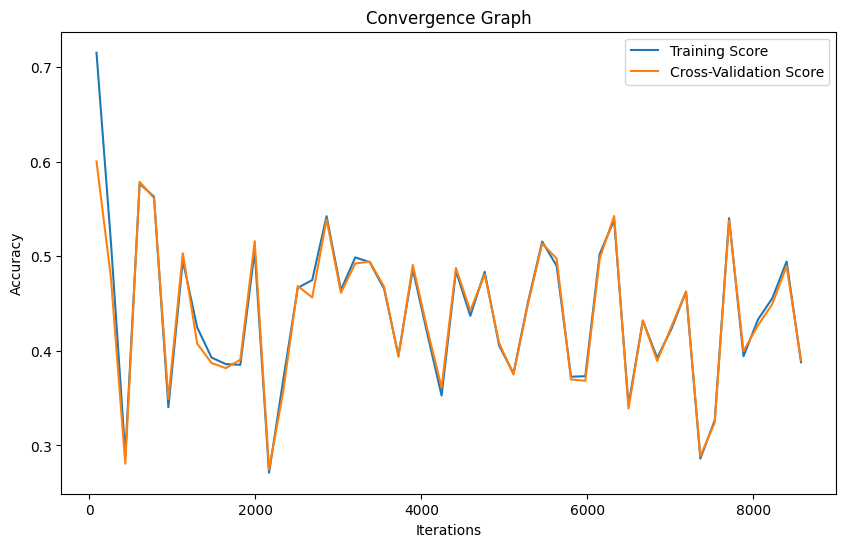

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()